In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("C:/Users/Gunjan/Desktop/Data Analytics/Project/Real_Estate/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
# Drop columnn that are not required
df = df.drop(['area_type','society','balcony','availability'],axis='columns')
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [6]:
df.shape

(13320, 5)

In [8]:
## Cleaning ##

In [7]:
# Check null values
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# drop null value rows with location and size column
df.dropna(subset=['location', 'size'], axis = 0, inplace = True)

In [9]:
# Replace null in bath column with average
avg = df['bath'].astype("float").mean()
print("Average number of bathrooms:", round(avg))
df['bath'].replace(np.nan, round(avg), inplace = True)

Average number of bathrooms: 3


In [10]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df['bedrooms'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.bedrooms.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
# Found 27, 19, 43 bedrooms seems outliers. Would see number of rooms greater than 10
df=df[~(df.total_sqft/df.bedrooms<400)].head()
# There is problem with total_sqft column we first will fix that then come back

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [14]:
# found some incorrect data 
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df[~df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,3.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,3.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,3.0,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [17]:
# Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value 
# in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. 
# I am going to just drop such corner cases to keep things simple

def convert_range_to_num(x):
    split = x.split('-')
    if len(split) == 2:
        return (float(split[0])+float(split[1]))/2
    try:
        return float(x)
    except:
        return None 

In [18]:
df1 = df.copy()
df1.total_sqft = df1.total_sqft.apply(convert_range_to_num)
df1 = df1[df1.total_sqft.notnull()]
df1

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [19]:
df1[["total_sqft"]] = df1[["total_sqft"]].astype("float")

In [20]:
df1.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bedrooms        int64
dtype: object

In [21]:
df1['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [22]:
len(df1['location'].unique())

1298

In [23]:
df1.location = df1.location.apply(lambda x: x.strip())
locations = df1['location'].value_counts(ascending=False)
locations

Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [24]:
locations.values.sum()

13257

In [25]:
locations_less_than_ten = locations[locations<=10]
locations_less_than_ten

Sadashiva Nagar              10
BTM 1st Stage                10
Nagadevanahalli              10
Sector 1 HSR Layout          10
Basapura                     10
                             ..
Nagarbhavi  BDA Complex       1
Rajanna Layout                1
1 Ramamurthy Nagar            1
Lakshmipura Vidyaanyapura     1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [26]:
df1['location']=df1['location'].apply(lambda x: 'others' if x in locations_less_than_ten else x)
len(df1['location'].unique())

241

In [27]:
# remove outliers
df2 = df1[~(df1.total_sqft/df1.bedrooms<400)]

In [28]:
df2.shape

(11767, 6)

In [29]:
# add price per sq column
df2['price_per_sqft_in_rupees']=df2['price']*100000/df2['total_sqft']
df2.head()

C:\Users\Gunjan\AppData\Local\Temp\ipykernel_5292\586138058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_per_sqft_in_rupees']=df2['price']*100000/df2['total_sqft']


,location,size,total_sqft,bath,price,bedrooms,price_per_sqft_in_rupees
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
#Statistical Analysis
df2.describe()

,total_sqft,bath,price,bedrooms,price_per_sqft_in_rupees
count,11767.000000,11767.000000,11767.000000,11767.000000,11767.000000
mean,1622.262748,2.541089,112.035789,2.607462,6183.582180
std,1290.561383,1.039092,155.020025,0.931436,4002.695891
min,400.000000,1.000000,9.000000,1.000000,267.829813
25%,1130.000000,2.000000,50.000000,2.000000,4210.526316
50%,1320.000000,2.000000,70.000000,2.000000,5281.690141
75%,1725.000000,3.000000,115.000000,3.000000,6801.382836
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [31]:
## another outlier  price per sq ft in Banglore would not be 267.82 or 176470 rupees. We can remove outliers by taking subset 
# of the data points where price_per_sqft is less than mean+std and greater than mean-std

# Standard deviation how desprese the dataset is around mean

def remove_outliers(x):
    df_out = pd.DataFrame()
    for key, subdf in x.groupby('location'):
        m = np.mean(subdf.price_per_sqft_in_rupees)
        st = np.std(subdf.price_per_sqft_in_rupees)
        subset_df = subdf[(subdf.price_per_sqft_in_rupees>(m-st)) & (subdf.price_per_sqft_in_rupees<=(m+st))]
        df_out = pd.concat([df_out,subset_df],ignore_index=True)
    return df_out


In [32]:
df3 = remove_outliers(df2)
df3.shape

(9546, 7)

In [33]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft_in_rupees),
                'std': np.std(bhk_df.price_per_sqft_in_rupees),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft_in_rupees<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [34]:
df4 = remove_bhk_outliers(df3)

df4.shape

(6873, 7)

In [35]:
# Similary Bathroom outliers

df4.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [36]:
# checking where bathrooms are greater than bedrooms
df4[df4.bath>df4.bedrooms+2]

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft_in_rupees
1450,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
4827,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6229,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7850,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [37]:
df4=df4[df4.bath<df4.bedrooms+2]

In [38]:
df4.shape

(6793, 7)

In [39]:
## Use One Hot Encoding For Location ##

In [40]:
dummies = pd.get_dummies(df4.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:

df5 = pd.concat([df4,dummies.drop('others',axis='columns')],axis='columns')
df5.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft_in_rupees,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# drop columns that are not required for model building
df6 = df5.drop(['size','price_per_sqft_in_rupees','location'],axis='columns')
df6.head(2)

,total_sqft,bath,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Model Development
#1. Linear Regression
from sklearn.linear_model import LinearRegression

In [46]:
#create model object
lm = LinearRegression()
lm

LinearRegression()

In [51]:
X = df6.drop(['price'],axis='columns')
Y = df6[['price']]

In [54]:
# Splitting Training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=10)

In [55]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [58]:
# fitting trained data on model
lm.fit(X_train,y_train)

LinearRegression()

In [59]:
# R^2 error of trained data
lm.score(X_train,y_train)

0.8738365647662361

In [60]:
# R^2 error of testing data
lm.score(X_test,y_test)

0.7802162920884088

In [61]:
# Cross Validation #

In [62]:
from sklearn.model_selection import cross_val_score

In [65]:
Rcross = cross_val_score(lm, X, Y, cv=4)
Rcross

array([0.45585807, 0.63497315, 0.58160704, 0.77547221])

In [66]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.6119776155115071 and the standard deviation is 0.11462434451555342


In [67]:
# Find best model using GridSearchCV #

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)


C:\Users\Gunjan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gunjan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gunjan\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Gunjan\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Gunjan\anaconda3\Lib\site-pack

,model,best_score,best_params
0,linear_regression,0.848520,{'fit_intercept': False}
1,lasso,0.708535,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.651124,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [74]:
# Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

In [75]:
## Test the model for few properties ##

In [78]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lm.predict([x])[0]

In [79]:

predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Gunjan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([88.52885602])

In [80]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\Gunjan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([173.40289906])

In [92]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
   
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in rupees)')
    plt.ylabel('House Features')
    plt.show()
    plt.close()

In [83]:
## check fitting of linear model
yhat_train = lm.predict(X_train)

In [85]:
yhat_test = lm.predict(X_test)

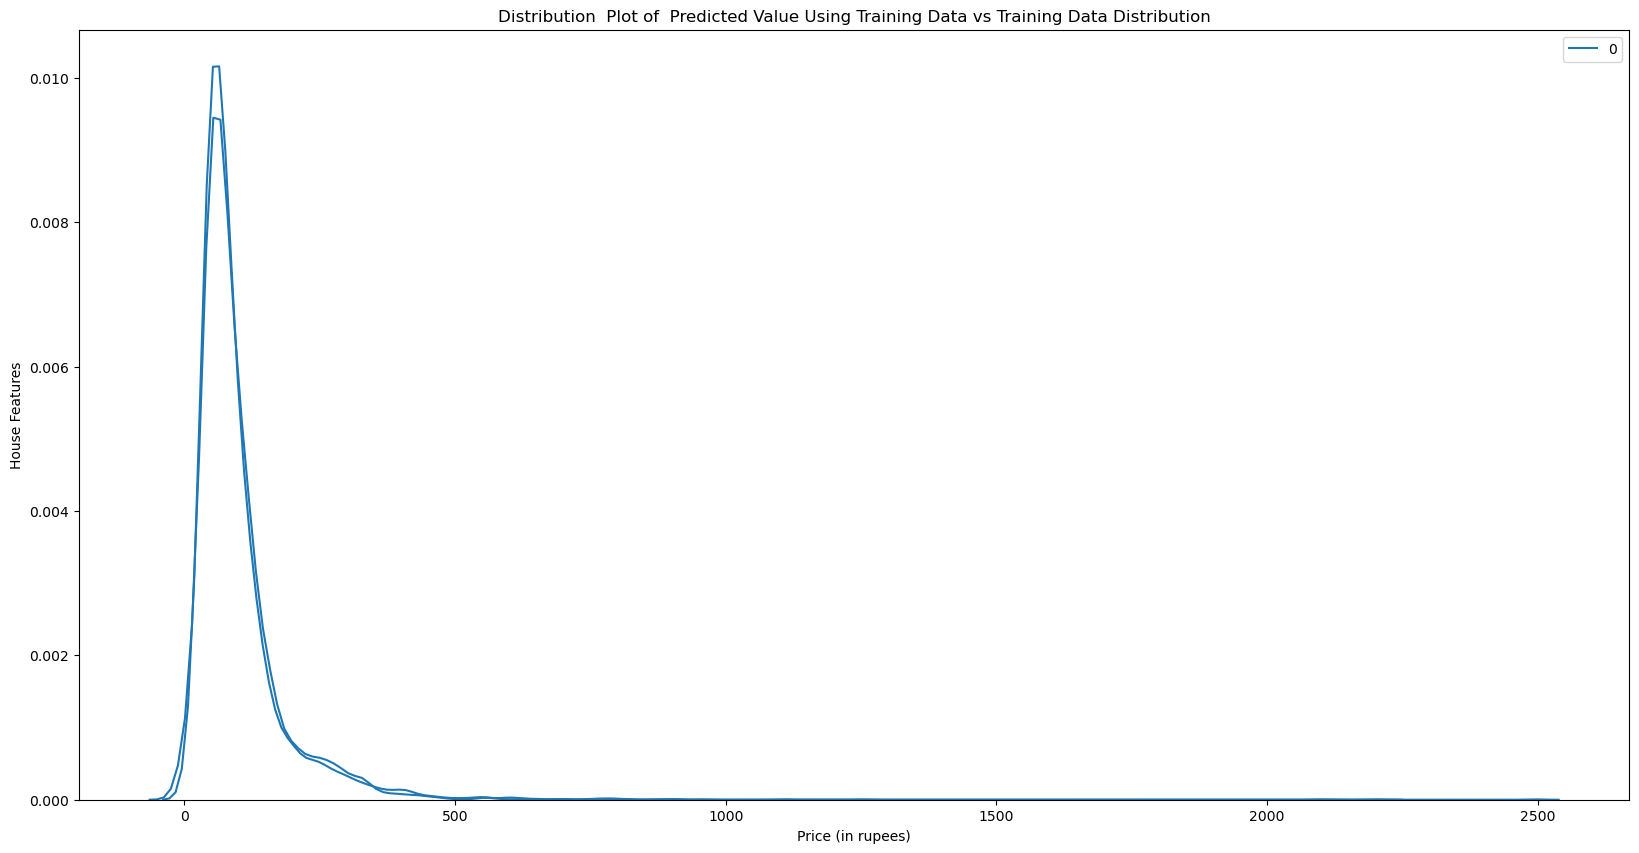

In [93]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

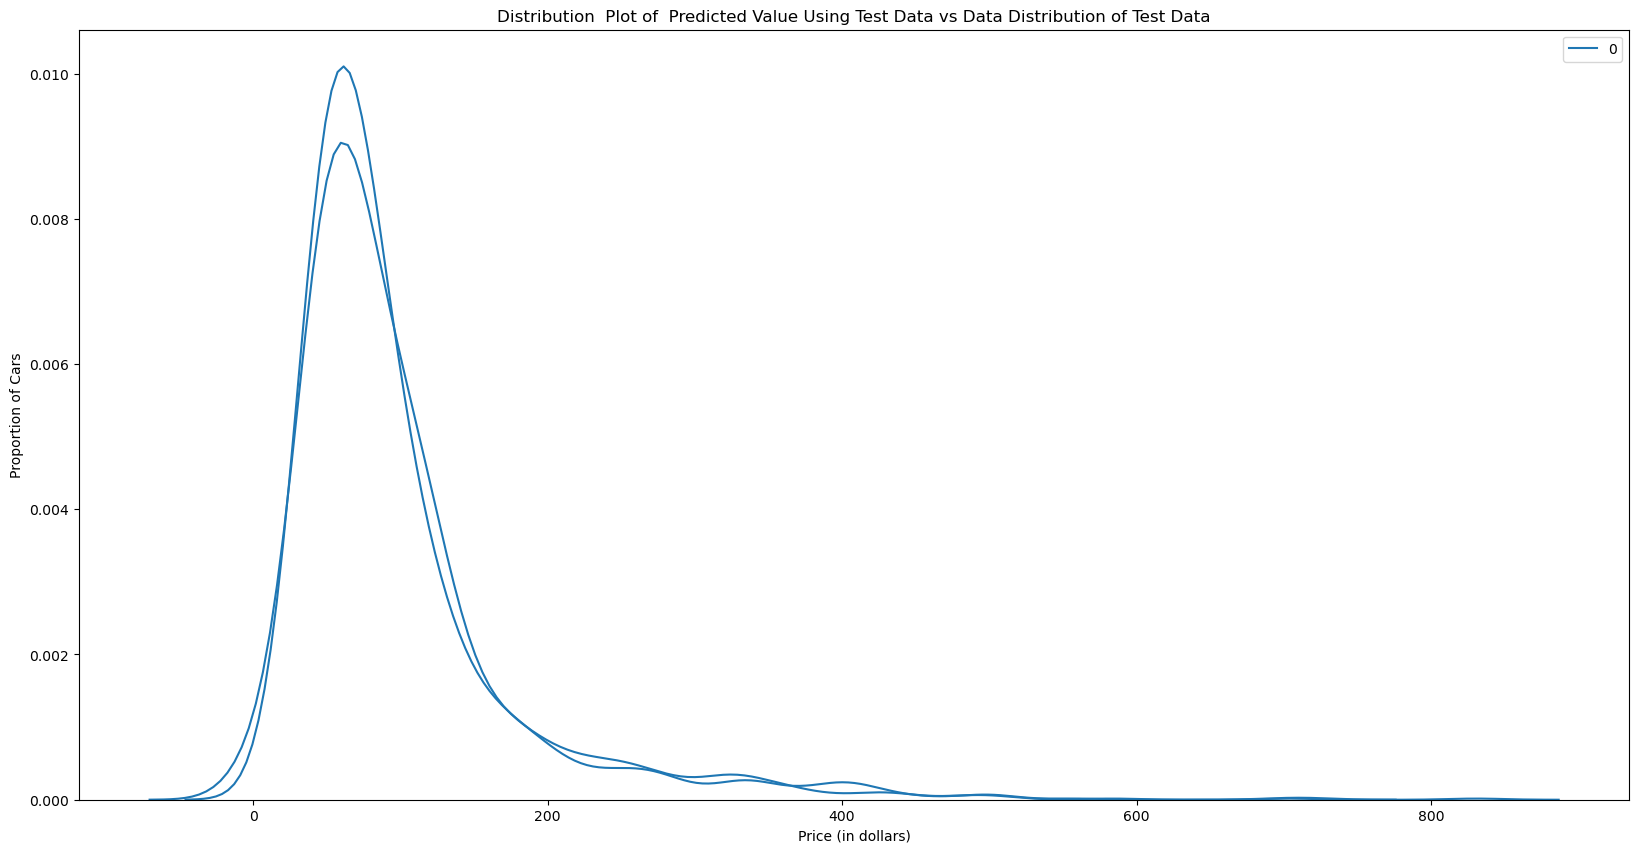

In [91]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [94]:
# model fits quite well